# Index
---

## 1. Project

- Project Description
- Team Members

## 2. Business Problem

- Customer affected
- Hypothesized soluton

## 3. Data 

- Source Location
- Table Descriptions
- Variable Descriptions

## 4. Processing Steps

- Data preparation
- Data storage
- Data Input/Processing
- Data Output/Interpretation

## 5. Preliminary SQL Query Questions

- Which major and which major category has the highest percentage of graduates who landed on a job not requiring a college degree or a low_wage service jobs.
- Which major’s graduate students’ median salary and undergraduate students’ median salary has the biggest difference. (In terms of absolute value and percentage separately)
- Which major’s graduate students have the highest full-time employment rate, part-time employment rate and unemployment rate.
- Which major category has the highest and lowest share of women graduates. And inside those two categories, which major has the highest and lowest median salary level separately?
- Which major(including undergraduate and graduate student) gets the most and least median salary. Which major's salary has the biggest difference between 75th percentile and 25th percentile?
- Which category of "STEM" majors receives the highest salary after graduation? And inside this field, specifically which major reveives the highest median salary?
- Which category of "STEM" majors receives the lowest salary after graduation? And inside this field, specifically which major reveives the lowest median salary?

## 6. Recommender Function

- Intallation of extra python packages
- Recoding majors
- Function creation

## 7. Dashboards

- Macroview of major category dataset
- Microview of major recommendation

# Project
---
### Project Description
> We wanted to create tools and resources to help university students determine which major has characteristics that best fit their interest. By analysing different majors their economic and demographic qualties such as median income, gender breakdown, unemployment rate, and other, we were able to create clear dashboards to give students insights on what differentiates majors asife from the content.

### Team Members

##### Song Lin 
- Supervised overall Project execution

##### Yigit Demiralp
- Developed python recommender function

##### Linghan Leng
- Devloped user dashboard and visualization

##### Bosoo Kim
- Created presentation and managed project timeline

##### Chiebuka Onwuzurike
- Supported Tableau and Python integration of data



# Business Problem
---
### Problem

- There is a staggering amount of majors to choose from
- Aside from the actully content taught, different major have differnt characteristics

### Hypothsized solution

- Student need a tool that can recommened majors as well as give numerical analysis on the different characteristics in an understandable format


# Data
---
### Data Source:
The data is from American Community Survey 2010-2012 Public Use Microdata Series. The relationship between one's college major and their earnings may seemed easy to predict, but that's not always the case. For example, popular major like psychology is also one of the lowest-paying majors, and choosing a "STEM" major doesn't guarantee a successful career. Also for some majors, a master's degree doesn't bring much elevation compared to a bachelor's degree. This survey hopes to provide guidance for high school graduates when choosing majors. We would also like to dig into it to have a better view of major choosing decisions.

#### All data is from American Community Survey 2010-2012 Public Use Microdata Series.

- Download data here: http://www.census.gov/programs-surveys/acs/data/pums.html

- Documentation here: http://www.census.gov/programs-surveys/acs/technical-documentation/pums.html


### Dataset Description

| Table | Description |
| ----------- | ----------- |
| All_ages | It contains 173 majors along with the major categories they belong. For each major, there are data about the total number of students graduating from it(including graduate and undergraduate students), number of students employed full-time or unemployed. The table also provides us with the median, 25th percentile and 75th percentile salary of the graduates.  |
| Grad_students | It contains basically the same element as "All_ages" only with more specific information about graduate students, which allows us to compare the income level of graduate students and undergraduate students from the same major. |
| Major_list | This one only contains major ID, major names and major categories, so this table is used to look up major with IDs.  |
| Recent_grads | It contains the employment and income level of recent graduate students. The most meaningful column are "College_jobs", "Non_college_jobs" and "Low_wagr_jobs", which basically tell us the number of graduate students who landed on jobs requiring and not requiring a college degree as well as the jobs in low-wage service jobs.   |
| Women_stem | This table specifies the share of women in each major. |

### Variable Description
Recent_grads Table

| Table | Description |
| ----------- | ----------- |
| Rank | Rank by median earnings |
| Major_code | Major code, FO1DP in ACS PUMS | 
| Major | Major description | 
| Major_category | Category of major from Carnevale et al | 
| Total | Total number of people with major | 
| Sample_size | Sample size (unweighted) of full-time, year-round ONLY (used for earnings) | 
| Men | Male graduates | 
| Women | Female graduates | 
| ShareWomen | Women as share of total | 
| Employed | Number employed (ESR == 1 or 2) | 
| Full_time | Employed 35 hours or more | 
| Part_time | Employed less than 35 hours | 
| Full_time_year_round | Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35) | 
| Unemployed | Number unemployed (ESR == 3) | 
| Unemployment_rate | Unemployed / (Unemployed + Employed) | 
| Median | Median earnings of full-time, year-round workers | 
| P25th | 25th percentile of earnings | 
| P75th | 75th percentile of earnings | 
| College_jobs | Number with job requiring a college degree | 
| Non_college_jobs | Number with job not requiring a college degree | 
| Low_wage_jobs | Number in low-wage service jobs | 

# Processing Steps
--- 
### Intiating

- [x] Moblize Team
- [x] Reviewing potential project topic
- [x] Evaluate datasets
- [x] Define problem

###  Data preparation

- [x] Confirming datasets
- [x] Joining datasets on primary keys

### Data storage

- [x] Creating GoogleCloud Project
- [x] Uploading dataset on Google BigQuery
- [x] Setting up AI Juptyer Notebook

### Data Input/Processing

- [x] Exploring data with queries
- [x] Feature Engineering
- [x] Creating recommender function

### Data Output/Interpretation

- [x] Creating Tableau worksheets
- [x] Combining necessary worksheets for dashboard




# Preliminary SQL Query
---

#### 1. Which major and which major category has the highest percentage of graduates who landed on a job not requiring a college degree or a low_wage service jobs.

In [2]:
%%bigquery
SELECT Major, Non_college_jobs, Low_wage_jobs, (Non_college_jobs/Total) as Non_college_jobs_Per, (Low_wage_jobs/Total) as Low_wage_jobs_Per
FROM `ba775-team-5b.College_Majors.Recent_grads`
ORDER BY Non_college_jobs_Per desc
LIMIT 5

,Major,Non_college_jobs,Low_wage_jobs,Non_college_jobs_Per,Low_wage_jobs_Per
0,COSMETOLOGY SERVICES AND CULINARY ARTS,7384,3163,0.702569,0.300951
1,"NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...",1475,124,0.697070,0.058601
2,"ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLO...",1659,81,0.681314,0.033265
3,MEDICAL ASSISTING SERVICES,6948,1270,0.624652,0.114178
4,DRAMA AND THEATER ARTS,25313,11068,0.585285,0.255913


In [3]:
%%bigquery
SELECT Major, Non_college_jobs, Low_wage_jobs, (Non_college_jobs/Total) as Non_college_jobs_Per, (Low_wage_jobs/Total) as Low_wage_jobs_Per
FROM `ba775-team-5b.College_Majors.Recent_grads`
ORDER BY Low_wage_jobs_Per desc
LIMIT 5

,Major,Non_college_jobs,Low_wage_jobs,Non_college_jobs_Per,Low_wage_jobs_Per
0,COSMETOLOGY SERVICES AND CULINARY ARTS,7384,3163,0.702569,0.300951
1,DRAMA AND THEATER ARTS,25313,11068,0.585285,0.255913
2,MISCELLANEOUS FINE ARTS,1714,755,0.513174,0.226048
3,CLINICAL PSYCHOLOGY,870,622,0.306554,0.219168
4,STUDIO ARTS,8707,3586,0.512870,0.211227


In [4]:
%%bigquery
SELECT Major_category, (Non_college_jobs/Category_total) as Non_college_jobs_Per, (Low_wage_jobs/Category_total) as Low_wage_jobs_Per
FROM
(
SELECT Major_category, sum(Total) as Category_total, sum(Men) as men, sum(Women) as women, sum(Non_college_jobs) as Non_college_jobs, sum(Low_wage_jobs) as Low_wage_jobs
FROM `ba775-team-5b.College_Majors.Recent_grads`
GROUP BY Major_category
)
ORDER BY Non_college_jobs_Per DESC

,Major_category,Non_college_jobs_Per,Low_wage_jobs_Per
0,Law & Public Policy,0.558459,0.115685
1,Arts,0.458433,0.168331
2,Agriculture & Natural Resources,0.456109,0.104456
3,Industrial Arts & Consumer Services,0.455281,0.115713
4,Communications & Journalism,0.440631,0.126324
5,Humanities & Liberal Arts,0.387589,0.132087
6,Business,0.381280,0.097351
7,Social Science,0.358978,0.102233
8,Psychology & Social Work,0.352107,0.116934
9,Interdisciplinary,0.317420,0.086288


In [5]:
%%bigquery
SELECT Major_category, (Non_college_jobs/Category_total) as Non_college_jobs_Per, (Low_wage_jobs/Category_total) as Low_wage_jobs_Per
FROM
(
SELECT Major_category, sum(Total) as Category_total, sum(Men) as men, sum(Women) as women, sum(Non_college_jobs) as Non_college_jobs, sum(Low_wage_jobs) as Low_wage_jobs
FROM `ba775-team-5b.College_Majors.Recent_grads`
GROUP BY Major_category
)
ORDER BY Low_wage_jobs_Per DESC

,Major_category,Non_college_jobs_Per,Low_wage_jobs_Per
0,Arts,0.458433,0.168331
1,Humanities & Liberal Arts,0.387589,0.132087
2,Communications & Journalism,0.440631,0.126324
3,Psychology & Social Work,0.352107,0.116934
4,Industrial Arts & Consumer Services,0.455281,0.115713
5,Law & Public Policy,0.558459,0.115685
6,Agriculture & Natural Resources,0.456109,0.104456
7,Social Science,0.358978,0.102233
8,Business,0.381280,0.097351
9,Biology & Life Science,0.280222,0.094174


### Answer1: 
Highest percentage of graduates who landed on a job not requiring a college degree, and it's also the major which has the highest percentage of graduates landed on low_wage service jobs:
> Major category 'Cosmetology Services and Culinary Arts' 

Highest percentage of graduates who landed on a job not requiring a college degree, and major category 'Arts' has the highest percentage of graduatesa landed on low_wage service jobs:
>Major category 'Law & Public Policy' 

### 2. Which major’s graduate students’ median salary and undergraduate students’ median salary has the biggest difference. (In terms of absolute value and percentage separately)

In [7]:
%%bigquery
SELECT Major, Major_category, (Grad_median - Nongrad_median) as Grad_premium_absolute, Grad_premium
FROM `ba775-team-5b.College_Majors.Grad_students`
ORDER BY Grad_premium DESC

,Major,Major_category,Grad_premium_absolute,Grad_premium
0,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,84000.0,1.647059
1,ZOOLOGY,Biology & Life Science,55000.0,1.000000
2,PHYSIOLOGY,Biology & Life Science,40000.0,0.800000
3,BIOLOGY,Biology & Life Science,41000.0,0.759259
4,BIOCHEMICAL SCIENCES,Biology & Life Science,41000.0,0.745455
...,...,...,...,...
168,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,2000.0,0.020000
169,SOIL SCIENCE,Agriculture & Natural Resources,0.0,0.000000
170,PETROLEUM ENGINEERING,Engineering,-2000.0,-0.015873
171,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,-1000.0,-0.018182


In [8]:
%%bigquery
SELECT Major, Major_category, (Grad_median - Nongrad_median) as Grad_premium_absolute, Grad_premium
FROM `ba775-team-5b.College_Majors.Grad_students`
ORDER BY Grad_premium_absolute DESC

,Major,Major_category,Grad_premium_absolute,Grad_premium
0,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,84000.0,1.647059
1,ZOOLOGY,Biology & Life Science,55000.0,1.000000
2,BIOCHEMICAL SCIENCES,Biology & Life Science,41000.0,0.745455
3,BIOLOGY,Biology & Life Science,41000.0,0.759259
4,CHEMISTRY,Physical Sciences,40000.0,0.666667
...,...,...,...,...
168,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,2000.0,0.020000
169,SOIL SCIENCE,Agriculture & Natural Resources,0.0,0.000000
170,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,-1000.0,-0.018182
171,ARCHITECTURAL ENGINEERING,Engineering,-2000.0,-0.025000


## Answer2:
Major’s graduate students’ median salary and undergraduate students’ median salary has the biggest difference in terms of percentage separately

> Major 'Health and Medical Preparatory Programs'

Major’s graduate students’ median salary and undergraduate students’ median salary has the biggest difference in terms of absolute value

> Major 'Health and Medical Preparatory Programs'

### 3. Which major’s graduate students have the highest full-time employment rate, part-time employment rate and unemployment rate.

In [ ]:
%%bigquery
SELECT Major, Major_category, Grad_unemployment_rate, (Grad_employed/Grad_total) as Grad_full_time_rate, ((Grad_employed - Grad_full_time_year_round)/Grad_total) as Grad_part_time_rate
FROM `ba775-team-5b.College_Majors.Grad_students`
order by Grad_full_time_rate DESC
LIMIT 1

In [ ]:
%%bigquery
SELECT Major, Major_category, Grad_unemployment_rate, (Grad_employed/Grad_total) as Grad_full_time_rate, ((Grad_employed - Grad_full_time_year_round)/Grad_total) as Grad_part_time_rate
FROM `ba775-team-5b.College_Majors.Grad_students`
order by Grad_part_time_rate desc
LIMIT 1

In [ ]:
%%bigquery
SELECT Major, Major_category, Grad_unemployment_rate, (Grad_employed/Grad_total) as Grad_full_time_rate, ((Grad_employed - Grad_full_time_year_round)/Grad_total) as Grad_part_time_rate
FROM `ba775-team-5b.College_Majors.Grad_students`
order by Grad_unemployment_rate desc
LIMIT 1

## Answer 3: 
Highest major for full-time employment rate:
> COMPUTER ENGINEERING

Highest major for part-time employment rate:
> MUSIC

Highest unemployment rate:
>ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLOGIES AND PRODUCTION

### 4. Which major category has the highest and lowest share of women graduates. And inside those two categories, which major has the highest and lowest median salary level separately?

In [6]:
%%bigquery
SELECT Major_category AS Lowest_Major_Category, AVG(ShareWomen) Avg_ShareWomen
FROM `ba775-team-5b.College_Majors.Women_stem`
WHERE Major_category IS NOT NULL
GROUP BY Major_category, ShareWomen
ORDER BY AVG(ShareWomen) DESC
LIMIT 1

,Lowest_Major_Category,Avg_ShareWomen
0,Health,0.967998


In [ ]:
%%bigquery
SELECT Major_category AS Highest_Major_Category, AVG(ShareWomen) Avg_ShareWomen
FROM `ba775-team-5b.College_Majors.Women_stem`
WHERE Major_category IS NOT NULL
GROUP BY Major_category, ShareWomen
ORDER BY AVG(ShareWomen) ASC
LIMIT 1

In [ ]:
%%bigquery
SELECT Major, Median AS Max_Median
FROM `ba775-team-5b.College_Majors.Women_stem`
WHERE Major_category ='Engineering'
ORDER BY Median DESC
LIMIT 1

In [ ]:
%%bigquery
SELECT Major, Median AS Min_Median
FROM `ba775-team-5b.College_Majors.Women_stem`
WHERE Major_category ='Engineering'
ORDER BY Median ASC
LIMIT 1

In [ ]:
%%bigquery
SELECT Major, Median AS Max_Median
FROM `ba775-team-5b.College_Majors.Women_stem`
WHERE Major_category ='Health'
ORDER BY Median DESC
LIMIT 1

In [ ]:
%%bigquery
SELECT Major, Median AS Min_Median
FROM `ba775-team-5b.College_Majors.Women_stem`
WHERE Major_category ='Health'
ORDER BY Median ASC
LIMIT 1

### Answer 4: 
The major category with the highest share of women:
> HEALTH 

The major category with the highest share of women:
> ENGINEERING

In the Health major cateogory, the major with highest median:
> NURSING with 48,000

In the Health major cateogory, the major with lowest median:
> COMMUNICATION DISORDERS SCIENCES AND SERVICES with 28,000

In the Engineering major cateogory, the major with highest median:
> PETROLEUM ENGINEERING with 110,00

In the Engineering major cateogory, the major with lowest median:
> MECHANICAL ENGINEERING RELATED TECHNOLOGIES 40,000

### 5. Which major(including undergraduate and graduate student) gets the most and least median salary. Which major's salary has the biggest difference between 75th percentile and 25th percentile?


In [1]:
%%bigquery
select Major, Major_category, Median as Median_Salary
from `ba775-team-5b.College_Majors.All_ages`
ORDER BY 3 DESC
LIMIT 1

,Major,Major_category,Median_Salary
0,PETROLEUM ENGINEERING,Engineering,125000


In [2]:
%%bigquery
select Major, Major_category, Median as Median_Salary
from `ba775-team-5b.College_Majors.All_ages`
ORDER BY 3
LIMIT 1

,Major,Major_category,Median_Salary
0,NEUROSCIENCE,Biology & Life Science,35000


In [3]:
%%bigquery
select Major, Major_category, Median, (P75th - P25th) as Percentile_Variation
from `ba775-team-5b.College_Majors.All_ages`
ORDER BY Percentile_Variation
LIMIT 1

,Major,Major_category,Median,Percentile_Variation
0,SCHOOL STUDENT COUNSELING,Education,41000,16800.0


In [4]:
%%bigquery
select Major, Major_category, Median, (P75th - P25th) as Percentile_Variation
from `ba775-team-5b.College_Majors.All_ages`
ORDER BY Percentile_Variation DESC
LIMIT 1

,Major,Major_category,Median,Percentile_Variation
0,PETROLEUM ENGINEERING,Engineering,125000,135000.0


## Answer 5: 
Major with the highest median income across all ages:
> Petroleum engineering. 

The major with the lowest salary:
> Neuroscience

Major with the lowest variation between the 25th and the 75th percentile:
> School Student Counseling 

Major with the highest variation between the 25th and the 75th percentile:
> Petroleum Engineering

### 6. Which category of "STEM" majors receives the highest salary after graduation? And inside this field, specifically which major reveives the highest median salary? 

In [8]:
%%bigquery
select Major_category, avg(Median) avg_median_salary
from `ba775-team-5b.College_Majors.All_ages`
where Major_code in (select Major_code from `ba775-team-5b.College_Majors.Women_stem`)
GROUP BY Major_category
ORDER BY avg(Median) DESC
Limit 1

,Major_category,avg_median_salary
0,Engineering,77758.62069


In [9]:
%%bigquery
SELECT Major,Median
from `ba775-team-5b.College_Majors.All_ages`
WHERE Major_category = 'Engineering'
ORDER BY Median DESC
LIMIT 1

,Major,Median
0,PETROLEUM ENGINEERING,125000


## Answer 6:

Major category that makes the highest median salary amoung all STEM major categories:
> Engineering

Within 'Engineering', major that makes the highest median salary:
> PETROLEUM ENGINEERING 

### 7. Which category of "STEM" majors receives the lowest salary after graduation? And inside this field, specifically which major reveives the lowest median salary? 

In [7]:
%%bigquery
select Major_category,avg(Median) avg_median_salary
from `ba775-team-5b.College_Majors.All_ages`
where Major_code in (select Major_code from `ba775-team-5b.College_Majors.Women_stem`)
group by Major_category
order by avg(Median)
Limit 1

,Major_category,avg_median_salary
0,Biology & Life Science,50821.428571


In [6]:
%%bigquery
select Major,Median
from `ba775-team-5b.College_Majors.All_ages`
where Major_category = 'Biology & Life Science'
order by Median
Limit 1

,Major,Median
0,NEUROSCIENCE,35000
1,MOLECULAR BIOLOGY,45000
2,ECOLOGY,47500
3,GENETICS,48000
4,BOTANY,50000
5,PHYSIOLOGY,50000
6,BIOLOGY,51000
7,ENVIRONMENTAL SCIENCE,52000
8,MISCELLANEOUS BIOLOGY,52000
9,BIOCHEMICAL SCIENCES,53000


## Answer 7: 
Amoung all STEM major, the category that makes the least median salary:
> Biology & Life Science

Within 'Biology & Life Science', the major that makes the least median salary:
> Neuroscience

# Recommender Function
---

In [1]:
%%bigquery df_all_ages
SELECT * FROM  `ba775-team-5b.College_Majors.All_ages`

In [2]:
%%bigquery df_bachelors
SELECT * FROM `ba775-team-5b.College_Majors.Recent_grads`

In [3]:
%%bigquery df_grad
SELECT * FROM `ba775-team-5b.College_Majors.Grad_students`

In [ ]:
df.Major_category.unique()

In [ ]:
pip install ipywidgets

In [ ]:
! jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [ ]:
! jupyter nbextension enable --py widgetsnbextension


In [4]:
majors_dict = {'A' : 'x', 
               'H' : 'x', 
               'Bus' : 'x', 
               'Ed' : 'x',
               'Eng' : 'x',
               'Soc' : 'x', 
               'Inter' : 'x',
               'Physical': 'x', 
               'Law':'x',
              'Bio': 'x',
               'Comp & Math' : 'x',
               'Psych & Soc' : 'x',
               'Hum' : 'x',
               'Comms & Journal' : 'x',
               'Agriculture' : 'x',
               'Industry & Consumer' : 'x'              
            }

majors_abbrv = {}
for key, value in zip(majors_dict, df_all_ages.Major_category.unique()):
    majors_abbrv[key] = value
    

In [ ]:
def recommend_major(major_cat = 'A', major = '', l_of_school = 'A', sort = 'Median'):
    significant_columns = ['Major_category', 'Major', 'Median', 'P25th', 'P75th', 'Unemployment_rate']
    grad_significant_columns = ['Major_category', 'Major', 'Grad_median', 'Grad_P25', 'Grad_P75', 'Grad_unemployment_rate', 'Grad_premium']
    
    l_of_school = input('''Are you planning on attending bachelor's or graduate level courses? ("B" for Bachelor's, "G" for Graduate, "A" for both)''')
    major_cat = input('''Which major categories are you interested in?''')
    
    if l_of_school == 'A':
        df = df_all_ages[significant_columns]
        
    elif l_of_school == 'B':
        significant_columns.append('ShareWomen')
        df = df_bachelors[significant_columns]
        gender_relevancy = input('''Is it important to you that you study a major where historically your gender has represented more than 30% of the population? (Y/N)''')
        
        if gender_relevancy == 'Y':
            gender = input('What gender do you identify as? (Woman/Man)')

            if gender == 'Man':
                df = df_bachelors[df_bachelors['ShareWomen'] <= .70][significant_columns]
            elif gender == 'Woman':
                df = df_bachelors[df_bachelors['ShareWomen'] >= .30][significant_columns]
        
        
    elif l_of_school == 'G':
        df = df_grad[grad_significant_columns]
        sort = 'Grad_median'
        
    if major != '':
        return df[df['Major'] == major].sort_values(by=sort, ascending=False)[:5]
    else:
        if ',' in major_cat:
            return df[df['Major_category'].isin(majors_abbrv[i] for i in [i.strip() for i in major_cat.split(',')])].sort_values(by=sort, ascending=False)[:5]
        else:
            return df[df['Major_category'] == majors_abbrv[major_cat]].sort_values(by=sort, ascending=False)[:5]
    

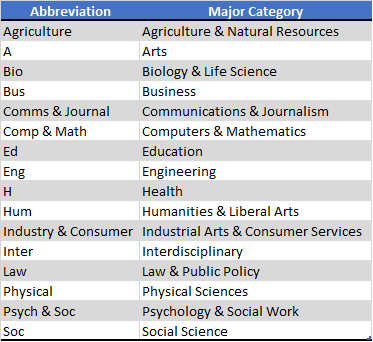

In [6]:
#Import library
from IPython.display import Image
 # Load image from local storage
Image(filename = "Abbr.png", width = 600, height = 300)

In [ ]:
recommend_major()

Are you planning on attending bachelor's or graduate level courses? ("B" for Bachelor's, "G" for Graduate, "A" for both) B


# Dashboards
---

### Macroview of Major Categories

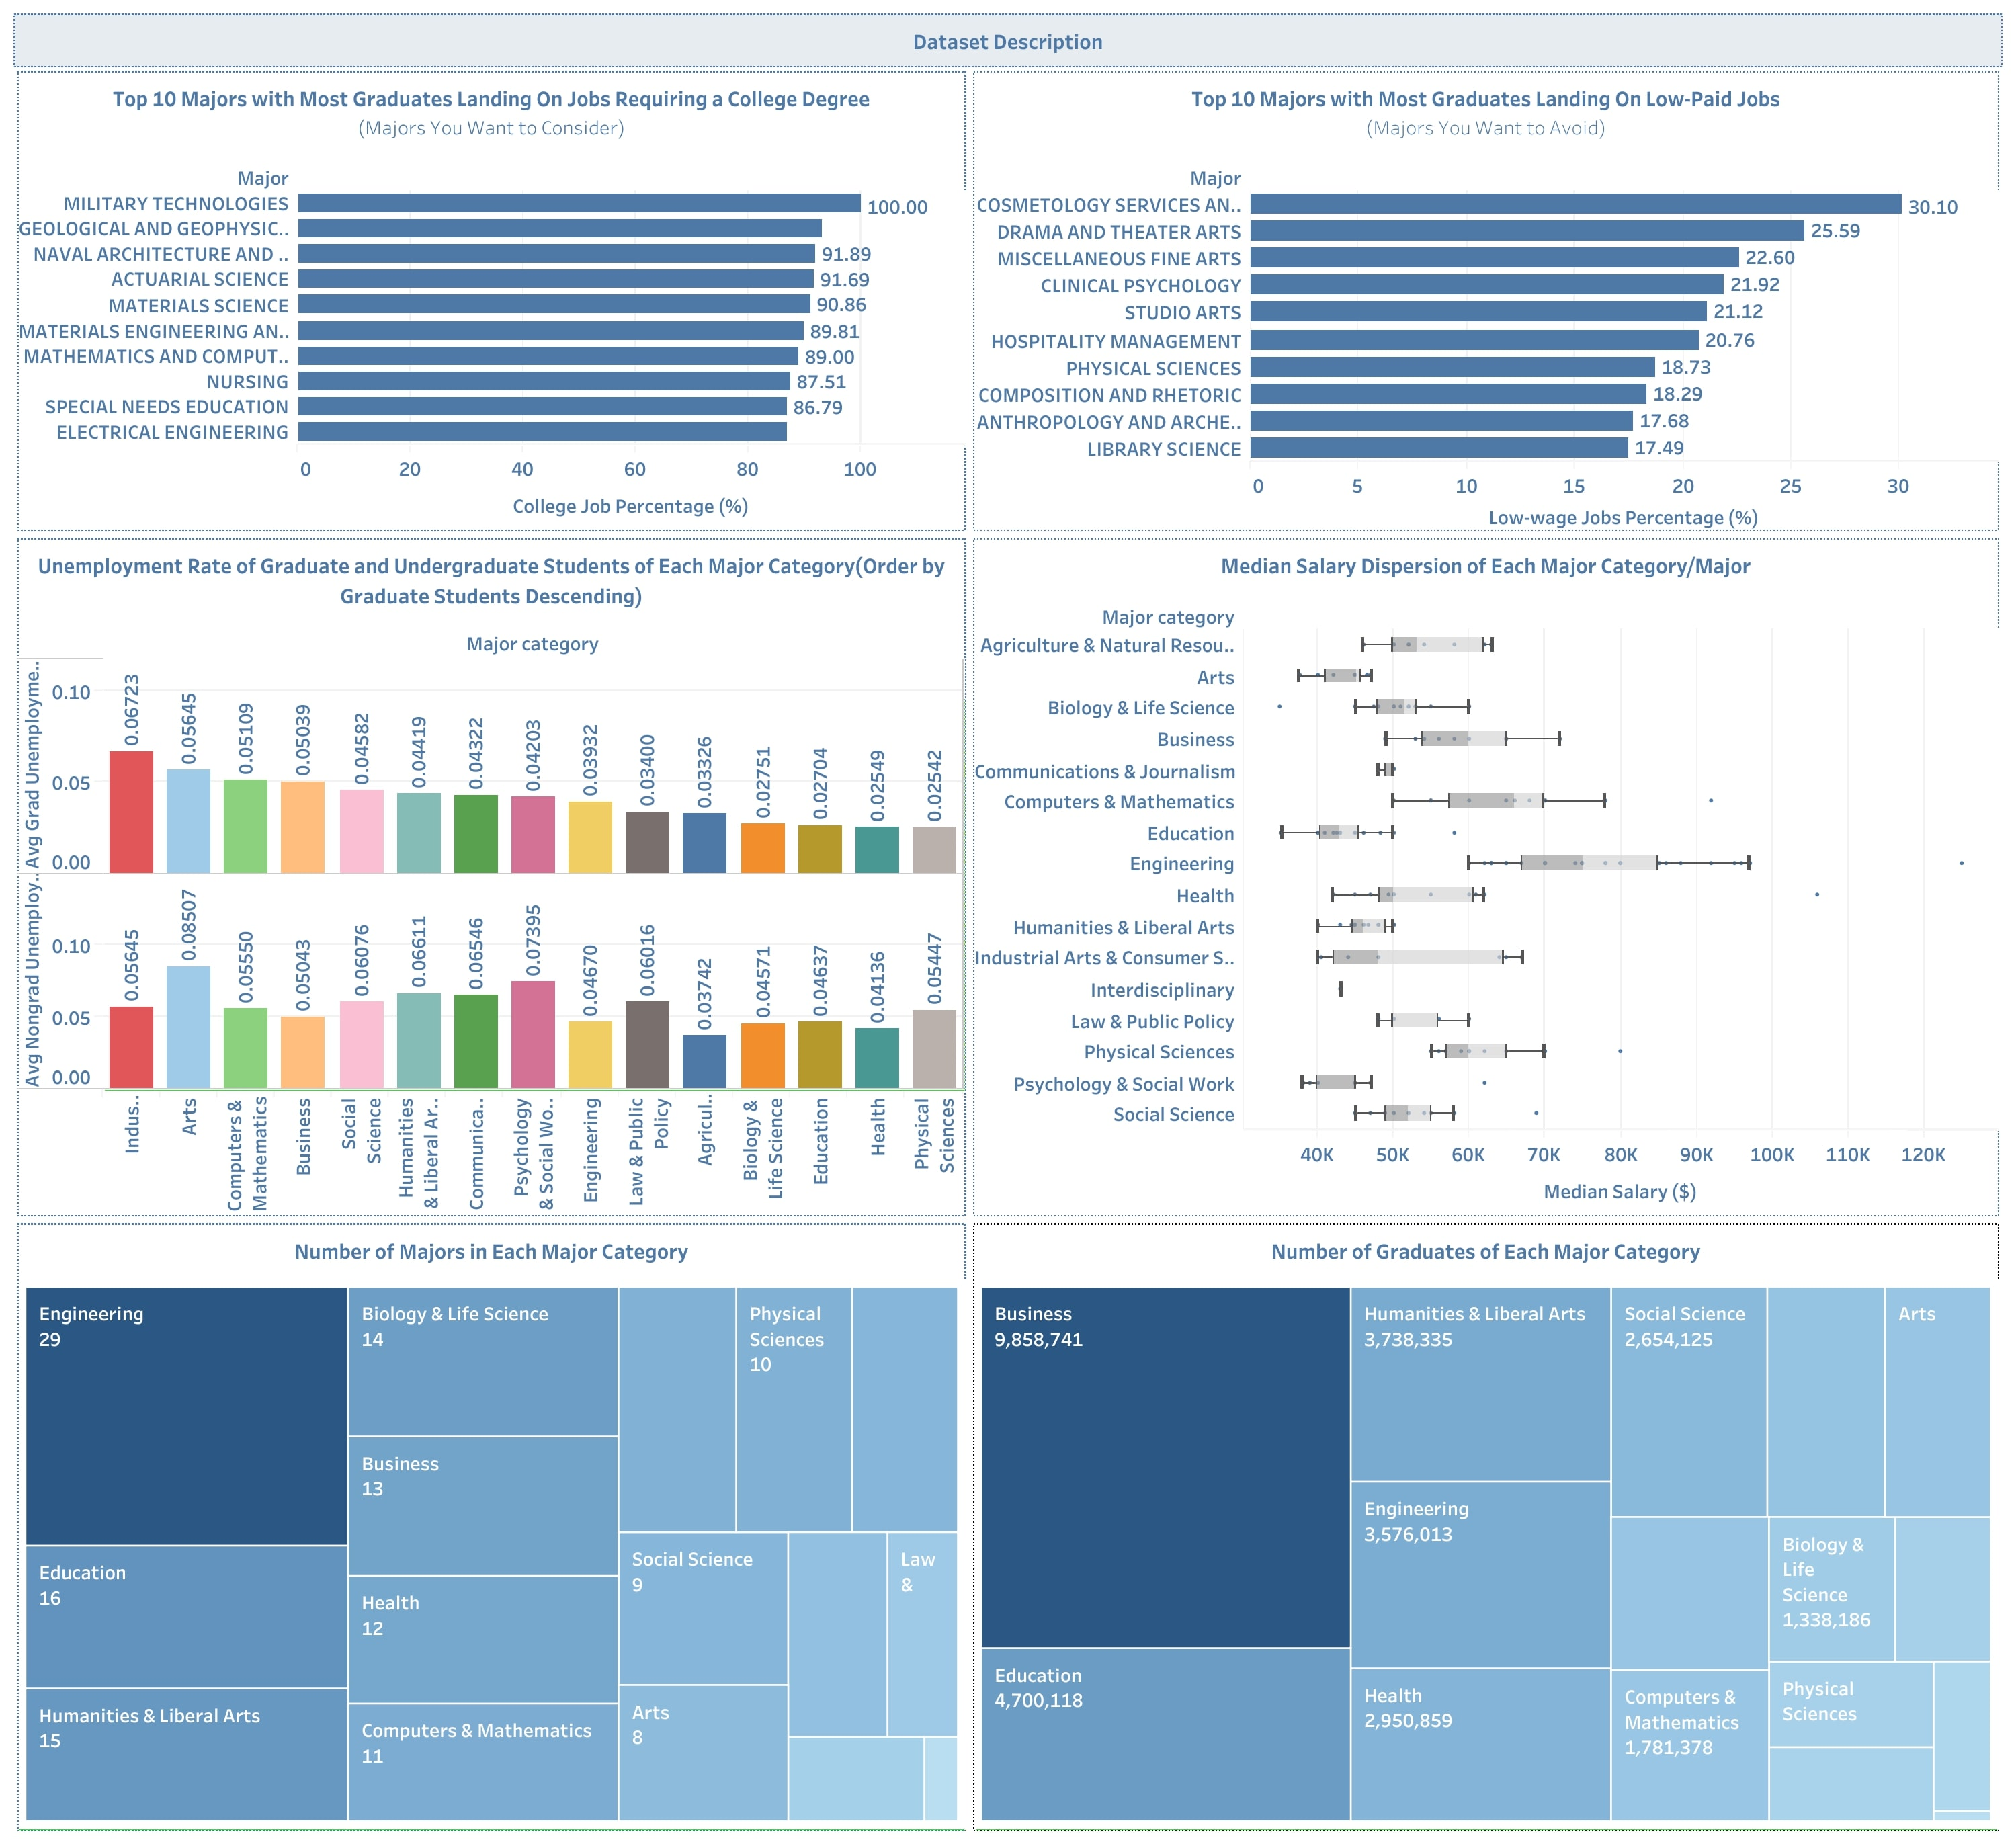

In [15]:
#Import library
from IPython.display import Image
 # Load image from local storage
Image(filename = "Dataset Descrption.png", width = 600, height = 300)

### Link: https://public.tableau.com/views/Team5B/DatasetDescrption?:language=en&:display_count=y&publish=yes&:origin=viz_share_link

### Microview of Majors (Ex. Mathematics and Computer Science)

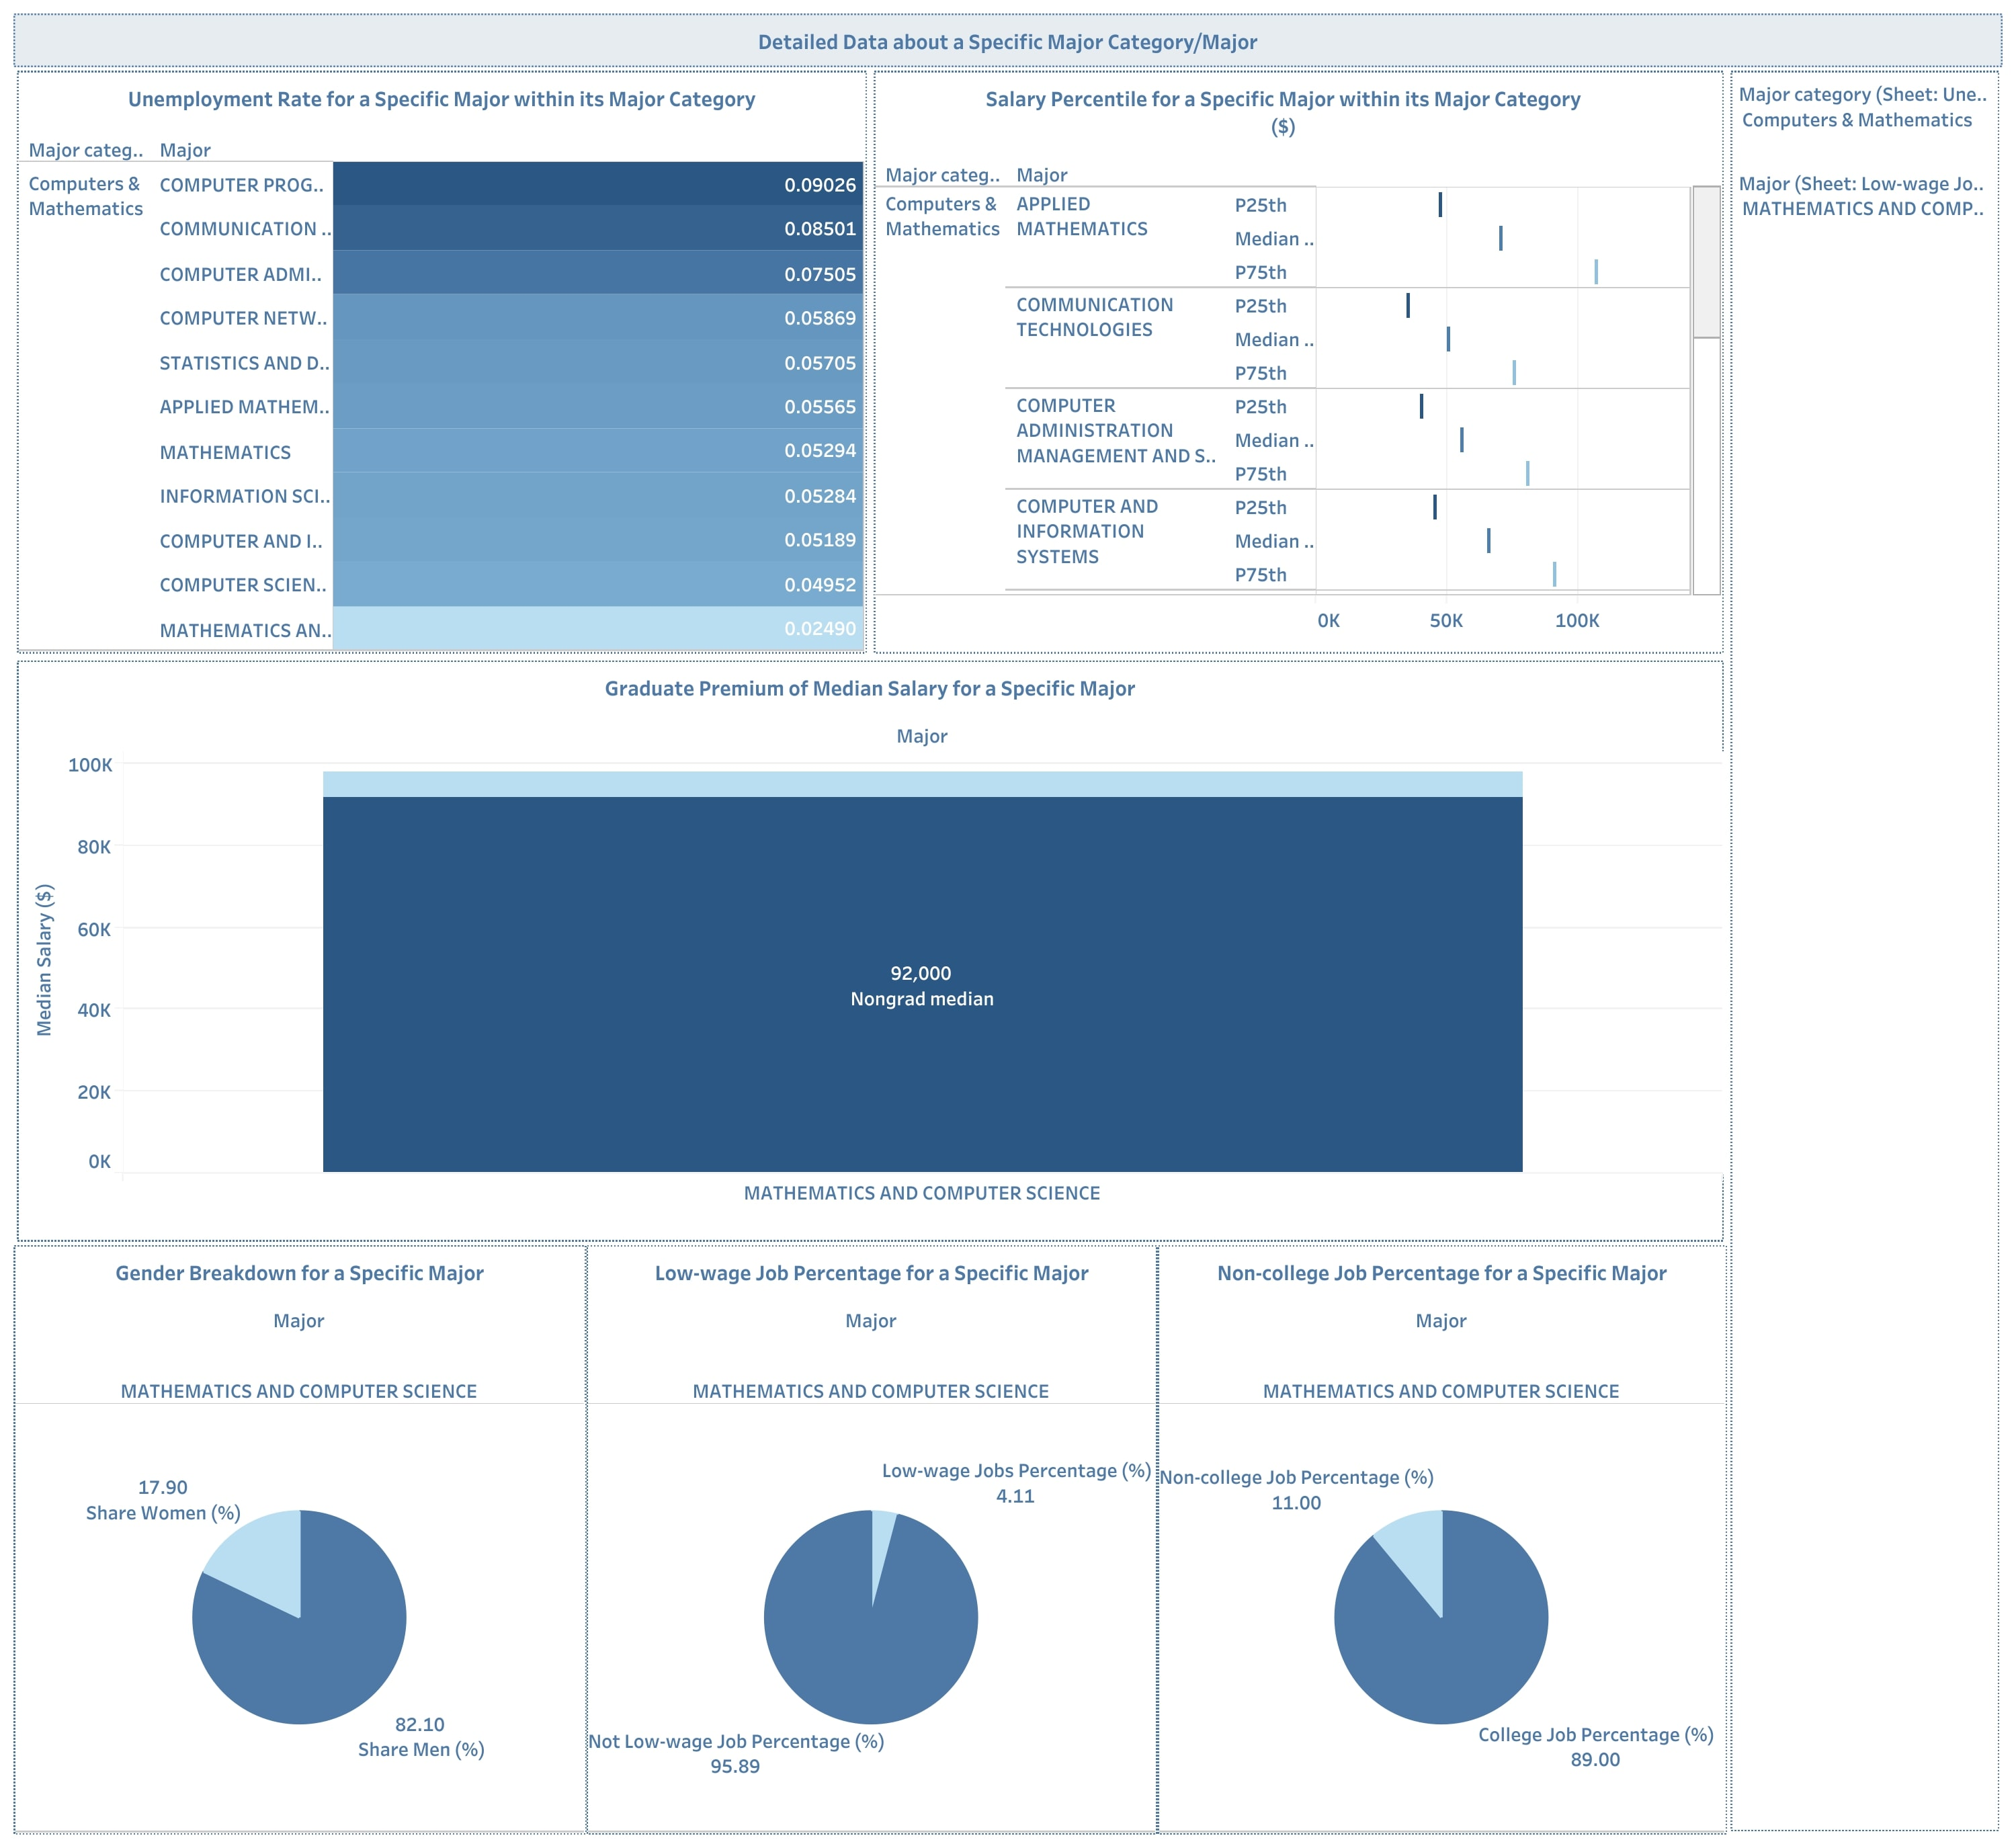

In [13]:
#Import library
from IPython.display import Image
 # Load image from local storage
Image(filename = "Detailed Data about a Specific Major Category_Major.png", width = 600, height = 300)

### Link: https://public.tableau.com/views/Team5B/DetailedDataaboutaSpecificMajorCategoryMajor?:language=en&:display_count=y&publish=yes&:origin=viz_share_link